In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

***
<h4>1. Wczytaj końcowe i przetworzone zbiory danych z zajęć Lab3.</h4>

In [2]:
x_train = pd.read_csv("x_train.csv")
x_test = pd.read_csv("x_test.csv")
y_train = pd.read_csv("y_train.csv")
y_test = pd.read_csv("y_test.csv")

In [3]:
x_train.head(5)

,cabin,CabinReduced,sex,cabin_map,CabinReduced_map,sex_map
0,NaN,NaN,female,6,5,0
1,NaN,NaN,female,6,5,0
2,NaN,NaN,female,6,5,0
3,NaN,NaN,male,6,5,1
4,NaN,NaN,female,6,5,0


In [4]:
y_test.head(5)

,survived
0,0
1,1
2,0
3,0
4,0


***
<h4>2. Scharakteryzuj dany algorytm na podstawie informacji
zawartej w dokumentacji biblioteki scikit-learn.</h4>

<h5>2.1. RandomForestClassifier</h5>

Jest to algorytm zbudowany z wielu klasyfikatorów - drzew decyzyjnych, z których kazde z drzew bodowane jest z losowego podzbioru z danych uczących - w przypadku jeśli zdecydujemy się na korzystanie z metody bootstrapowej, w innym wypadku do zbudowania kadego
drzewa będzie uzywał całego zbioru uczącego. Wykorzystuje uśrednienianie, aby poprawić jakość predykcji. Dla danego zestawu cech wygrywa klasa, do której prowadziło najwięcej drzew.
Wybrane parametry:
* n_estimatorsint (default=100) - liczba drzew w lesie
* max_depthint (default=None) - maksymalna głębokość drzewa
* bootstrap (default=True) - decyduje czy będziemy korzystać z metody bootsrap
* max_samples (int lub float, default=None) - jeśli korzytsamy z bootstrapu to decydujemy o maksymalnej liczbie próbek

<h5>2.2. LogisticRegression</h5>

Algorytm Regresji Logistycznej działaniem jest zblizony do regresji liniowej, ale wynikiem jego działania jest klasyfikacja binarna (0 lub 1) dlatego zmienn awynikowa musi mieć charakter dychotomiczny.
Oblicza prawdopodobieństwo wystąpienia zdarzenia. Wykorzystywana jest funkcja sigmoidalna, która daje wynikowy wykres w kształcie litry 'S'.


<h5>2.3. GradientBoostingClassifier</h5>

Algorytm Gradient Boosting Classifier składa się z określonej przez parametr 'n_estimators' liczby drzew (domyślnie 100), gdzie drzewa uczone są jedno po drugim, tak aby następne uczyło się na błędach poprzednika - kazde kolejne drzewo dązy do zminimalizowania błędów popełnionych przez poprzednika.
Algorytm jest odporny na overfitting, więc duza wartosc 'n_estimators' wpływa na poprawę wyników predykcji.

<h5>3.4. AdaBoostClassifier</h5>

Algorytm AdaBoost Classifier w kolejnych iteracjach trenuje drzewa, a następnie porónuje otrzymane klasyfikacje oraz wybieramy najlepsze drzewo. Następnie aktualizujemy wagi, tak aby kolejne drzewo nie popełniło tych błędów co poprzednik. Jeśli doszło do błędnej kalsyfikacji - zwiększamy wagi dla próbek powiązanych z nimi, a jeśli do poprawnej klasyfikacji to zmniejszamy te wagi. Dzięki temu kolejne drzewa są lepiej dopasowane do danych.


***
<h4>3. Zbuduj, wytrenuj model oraz dokonaj predykcji używając podanych metod dla danych o wysokiej i niskiej liczbności cech</h4>

<h5>3.1. RandomForestClassifier</h5> 

Dla danych o duzej liczebności

In [5]:
RF = RandomForestClassifier(n_estimators=220, random_state=42)

RF.fit(x_train[['cabin_map', 'sex_map']], np.ravel(y_train['survived']))

# y_pred = RF.predict(x_test[['cabin_map', 'sex_map']])

PredTrain = RF.predict_proba(x_train[['cabin_map', 'sex_map']])
PredTest = RF.predict_proba(x_test[['cabin_map', 'sex_map']].fillna(0))

test_RF_h = roc_auc_score(y_test,PredTest[:, 1])
train_RF_h = roc_auc_score(y_train,PredTrain[:, 1])

In [6]:
print('Dane testowe: ' + str(test_RF_h))
print('Dane treningowe: ' + str(train_RF_h))

Dane testowe: 0.7578812012609921
Dane treningowe: 0.8529126140314686


Dla danych o małej liczebności

In [7]:
RF = RandomForestClassifier(n_estimators=220, random_state=42)

RF.fit(x_train[['CabinReduced_map', 'sex_map']], y_train['survived'].values)

y_pred = RF.predict(x_test[['CabinReduced_map', 'sex_map']])

PredTrain = RF.predict_proba(x_train[['CabinReduced_map', 'sex_map']])
PredTest = RF.predict_proba(x_test[['CabinReduced_map', 'sex_map']].fillna(0))

test_RF_l = roc_auc_score(y_test,PredTest[:, 1])
train_RF_l = roc_auc_score(y_train,PredTrain[:, 1])

In [8]:
print('Dane testowe: ' + str(test_RF_l))
print('Dane treningowe: ' + str(train_RF_l))

Dane testowe: 0.8013245948786019
Dane treningowe: 0.816719415917359


<h5>3.2. LogisticRegression</h5>

Dla danych o duzej liczebności

In [9]:
LR = LogisticRegression()

LR.fit(x_train[['cabin_map', 'sex_map']], y_train['survived'].values)

PredTrain = LR.predict_proba(x_train[['cabin_map', 'sex_map']])
PredTest = LR.predict_proba(x_test[['cabin_map', 'sex_map']].fillna(0))

test_LR_h = roc_auc_score(y_test,PredTest[:, 1])
train_LR_h = roc_auc_score(y_train,PredTrain[:, 1])

In [10]:
print('Dane testowe: ' + str(test_LR_h))
print('Dane treningowe: ' + str(train_LR_h))

Dane testowe: 0.7899867263978761
Dane treningowe: 0.8121757682186185


Dla danych o małej liczebności

In [11]:
LR = LogisticRegression()

LR.fit(x_train[['CabinReduced_map', 'sex_map']], y_train['survived'].values)

y_pred = LR.predict(x_train[['CabinReduced_map', 'sex_map']])

PredTrain = LR.predict_proba(x_train[['CabinReduced_map', 'sex_map']])
PredTest = LR.predict_proba(x_test[['CabinReduced_map', 'sex_map']].fillna(0))

test_LR_l = roc_auc_score(y_test,PredTest[:, 1])
train_LR_l = roc_auc_score(y_train,PredTrain[:, 1])

In [12]:
print('Dane testowe: ' + str(test_LR_l))
print('Dane treningowe: ' + str(train_LR_l))

Dane testowe: 0.8022648083623694
Dane treningowe: 0.8026507127438499


<h5>3.3. GradientBoostingClassifier</h5>

Dla danych o duzej liczebności

In [13]:
GBC = GradientBoostingClassifier()

GBC.fit(x_train[['cabin_map', 'sex_map']], y_train['survived'].values)

PredTrain = GBC.predict_proba(x_train[['cabin_map', 'sex_map']])
PredTest = GBC.predict_proba(x_test[['cabin_map', 'sex_map']].fillna(0))

test_GBC_h = roc_auc_score(y_test,PredTest[:, 1])
train_GBC_h = roc_auc_score(y_train,PredTrain[:, 1])

In [14]:
print('Dane testowe: ' + str(test_GBC_h))
print('Dane treningowe: ' + str(train_GBC_h))
print('Róznica: ' + str(roc_auc_score(y_train,PredTrain[:, 1])-roc_auc_score(y_test,PredTest[:, 1])))

Dane testowe: 0.768140589569161
Dane treningowe: 0.8434102013193184
Róznica: 0.07526961175015745


Dla danych o małej liczebności

In [15]:
GBC = GradientBoostingClassifier()

GBC.fit(x_train[['CabinReduced_map', 'sex_map']], y_train['survived'].values)

PredTrain = GBC.predict_proba(x_train[['CabinReduced_map', 'sex_map']])
PredTest = GBC.predict_proba(x_test[['CabinReduced_map', 'sex_map']].fillna(0))

test_GBC_l = roc_auc_score(y_test,PredTest[:, 1])
train_GBC_l = roc_auc_score(y_train,PredTrain[:, 1])

In [16]:
print('Dane testowe: ' + str(test_GBC_l))
print('Dane treningowe: ' + str(train_GBC_l))

Dane testowe: 0.8011310215142968
Dane treningowe: 0.8166942572922274


<h5>3.4. AdaBoostClassifier</h5>

Dla danych o duzej liczebności

In [17]:
ABC = AdaBoostClassifier()

ABC.fit(x_train[['cabin_map', 'sex_map']], y_train['survived'].values)

PredTrain = ABC.predict_proba(x_train[['cabin_map', 'sex_map']])
PredTest = ABC.predict_proba(x_test[['cabin_map', 'sex_map']].fillna(0))

test_ABC_h = roc_auc_score(y_test,PredTest[:, 1])
train_ABC_h = roc_auc_score(y_train,PredTrain[:, 1])

In [18]:
print('Dane testowe: ' + str(test_ABC_h))
print('Dane treningowe: ' + str(train_ABC_h))
print('Róznica: ' + str(roc_auc_score(y_train,PredTrain[:, 1])-roc_auc_score(y_test,PredTest[:, 1])))

Dane testowe: 0.785824899065317
Dane treningowe: 0.8263778121053241
Róznica: 0.04055291304000708


Dla danych o małej liczebności

In [19]:
ABC = GradientBoostingClassifier()

ABC.fit(x_train[['CabinReduced_map', 'sex_map']], y_train['survived'].values)

PredTrain = ABC.predict_proba(x_train[['CabinReduced_map', 'sex_map']])
PredTest = ABC.predict_proba(x_test[['CabinReduced_map', 'sex_map']].fillna(0))
test_ABC_l = roc_auc_score(y_test,PredTest[:, 1])
train_ABC_l = roc_auc_score(y_train,PredTrain[:, 1])

In [20]:
print('Dane testowe: ' + str(test_ABC_l))
print('Dane treningowe: ' + str(train_ABC_l))
print('Róznica: ' + str(roc_auc_score(y_train,PredTrain[:, 1])-roc_auc_score(y_test,PredTest[:, 1])))

Dane testowe: 0.8011310215142968
Dane treningowe: 0.8166942572922274
Róznica: 0.015563235777930617


***
<h4>4. Odpowiedz jak różnią się wyniki dla danych z dużą liczebnością i niską
liczebnością cech. Gdzie widoczne jest zbyt duże dopasowanie?
Dlaczego?</h4>

<h5>4.1. RandomForestClassifier</h5>
Dla dancyh o duzej liczebnośći wysoka tendencja do overfittingu - widoczne zbyt duze dopasowanie, natomiast dla danych o małej liczebności wartości oblocznne dla zbioru testowego i treningowego są bardzo zblizone do siebie.

<h5>4.2. LogisticRegression</h5>
Dla danych o duzej liczebności - większa róznica między zbiorem treningowym, a testowym niz dla danych o małej liczebności cech, ale rónice te są na tyle niewielkie, ze nie ma overfittingu.


<h5>4.3. GradientBoostingClassifier</h5>
Dla dancyh o duzej liczebnośći cech widoczna tenedencja do overfittingu - rónica dla danych treningowych i testowych wynosi 0.075. Dla danych o małej liczebności cech, wartości dla roc_auc_score są bardzo zblione do siebie.

<h5>4.4. AdaBoostClassifier</h5>
Dla dancyh o duzej liczebnośći cech widoczna niewielka tenedencja do overfittingu - rónica dla danych treningowych i testowych wynosi 0.041. Dla danych o małej liczebności cech, wartości dla roc_auc_score są do siebie zblione.

***
<h4>8. Porównaj w/w algorytmy pomiędzy sobą w oparciu o przeprowadzone
badania. Które z nich mają największą tendencję do nadmiernego
dopasowania?</h5>

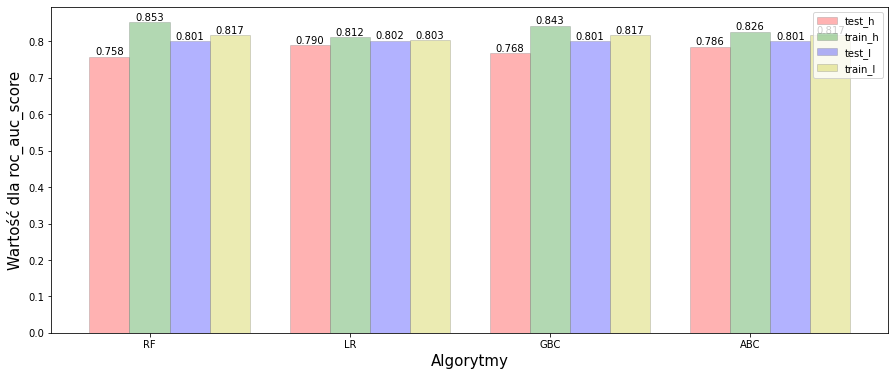

In [21]:
barWidth = 0.2
fig = plt.subplots(figsize =(15, 6))

test_h = [test_RF_h, test_LR_h, test_GBC_h, test_ABC_h]
train_h = [train_RF_h, train_LR_h, train_GBC_h, train_ABC_h]
test_l = [test_RF_l, test_LR_l, test_GBC_l, test_ABC_l]
train_l = [train_RF_l, train_LR_l, train_GBC_l, train_ABC_l]

br1 = np.arange(len(test_h))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]

bar1 = plt.bar(br1, test_h, color ='r', width = barWidth,
		edgecolor ='grey', alpha=0.3, label ='test_h')
bar2 = plt.bar(br2, train_h, color ='g', width = barWidth,
		edgecolor ='grey', alpha=0.3,label ='train_h')
bar3 = plt.bar(br3, test_l, color ='b', width = barWidth,
		edgecolor ='grey', alpha=0.3,label ='test_l')
bar4 = plt.bar(br4, train_l, color ='y', width = barWidth,
		edgecolor ='grey',  alpha=0.3, label ='train_l')

for rect in bar1 + bar2 + bar3 + bar4:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.3f}', ha='center', va='bottom')

plt.xlabel('Algorytmy', fontsize = 15)
plt.ylabel('Wartość dla roc_auc_score', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(test_h))],
		['RF', 'LR', 'GBC', 'ABC'])


plt.legend()
plt.show()


Algorytmy, które będą miały tendencję do overfittingu to te dla których będzie duza róznica w wysokości słupków dla odpowiednich danych testowych i treningowych (odpowiednio dla danych z duzua liczbą cech i oddzielnie dla tych z małą liczbą cech).
Na podstawie otrzymanych wartości i wykresu powyzej, największą tendencję do nadmiernego dopasowania ma algorytm RandomForestClassifier, następnie
GradientBoostingClassifier, AdaBoostClassifier. Najmniejsza róznica wysokości słupków dla LogisticRegression. Powyzsze spostrzezenia dotyczą danych o duzej liczebności cech. Dla danych o zredukowanej liczbie cech skłonności powyzszych algorytmow do overfittingu są nieporównywalnie mniejsze, co pozwala wysunąć wnioski, ze zmniejszenie liczebności cech chroni przed overfittingiem.


***
<h4>9. Jaka jest różnica pomiędzy predict_proba a predict?</h4>

* <strong>predict()</strong> - wynikiem jest dopasowanie do konkretnej klasy <br><br>
* <strong>predict_proba()</strong> - wynikiem jest prawdopodobieństwo z jakim przewidywana wartość zostanie przydzielona do danej klasy